# Boosting - Adaboost
This code shows the implementation of Adaboost as a Black Box using Decision Trees.

## Imports
import the necessary libraries from sklearn, matplotlib and numpy

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
warnings.filterwarnings('ignore')

## Function to create a mesh

In [9]:
def make_mesh(X):
    h =  0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    return xx,yy

Run inference on mesh

In [10]:
def run_mesh(xx,yy,clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

## Function for plotting Decision Region
This function takes a classifier and the Dataset, then plots the decision regions and the data points of the dataset in those regions.

In [11]:
def Decision_Region(X,y,clf):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    xx,yy = make_mesh(X)
        
    prebuilt_fig=plt.figure(figsize=(10,8))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(prebuilt_fig.number)
    plt.scatter(X[:,0],X[:,1],c=y, cmap=cm_bright, edgecolors='black',lw=1.5, s=50)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.show()
    

## Initialize
Initialize the random seed and the number of samples to choose from the make_moons dataset

In [12]:
np.random.seed(100)
n_samples=100

## Create the make_moons Dataset
Sample n_samples number of points from the dataset while adding some noise

In [13]:
X,y=make_moons(n_samples=n_samples, noise=0.25, random_state=2)

## Algorithm
This function internally fits $n\_estimators$ number of estimators on the make_moons samples. The estimators here are specified as Decision Trees of max_depth = 1.

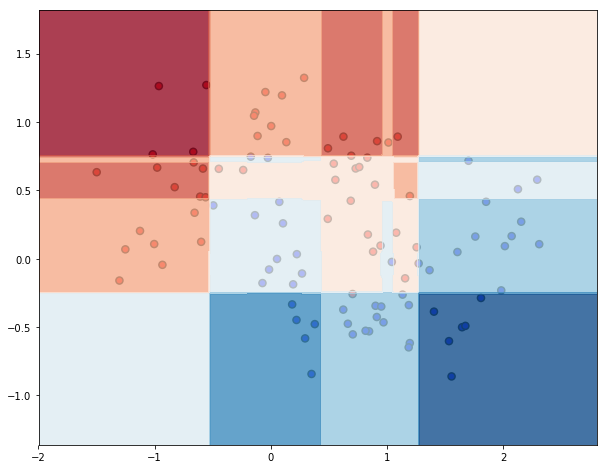

In [14]:
prebuilt_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20)
prebuilt_adaboost.fit(X,y)
Decision_Region(X,y,prebuilt_adaboost)